Import necessary libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import data

In [9]:
salary_df=pd.read_csv(r'C:\Users\hp\Desktop\IT projects\Salary_Data.csv')

Data cleaning

In [10]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
salary_df.info()
salary_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:
salary_df.dropna(inplace=True)

Visualization

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(-2.6805555555555483, 0.5, 'Salary')

<Figure size 1200x600 with 0 Axes>

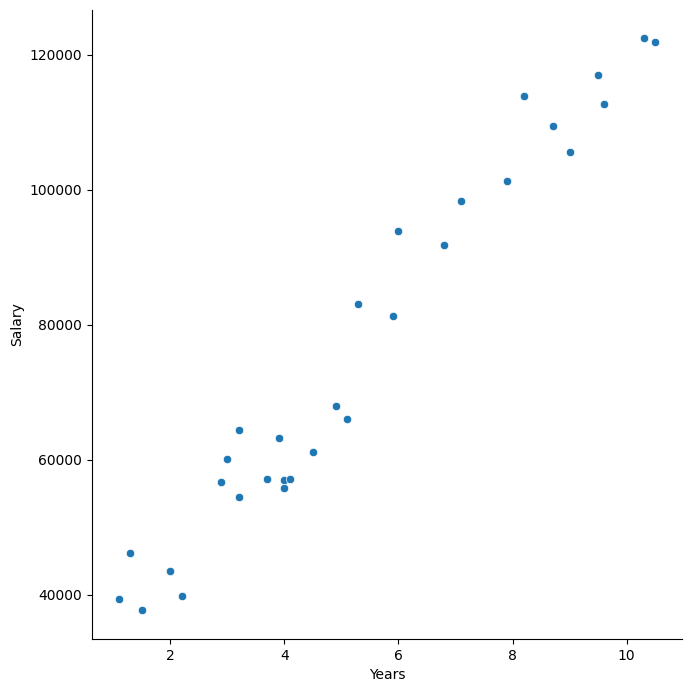

In [16]:
#Showing how the variables are scattered
plt.figure(figsize=(12,6))
sns.pairplot(salary_df,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')

C:\Users\hp\AppData\Local\Temp\ipykernel_20308\2389806523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_df["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

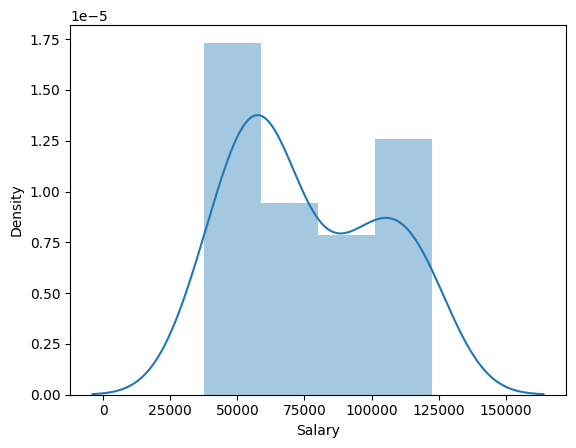

In [18]:
sns.distplot(salary_df["Salary"])

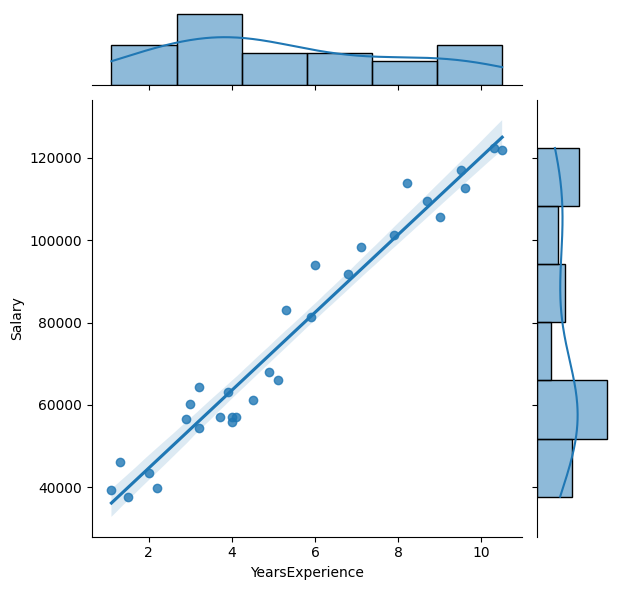

In [19]:
sns.jointplot(x="YearsExperience", y="Salary", kind="reg", data=salary_df)

Separate the features and the target variable

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
lr=LinearRegression()

In [40]:
X = salary_df[['YearsExperience']]  # Features (Independent Variable)
y = salary_df['Salary'] 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the model

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make Predictions

In [44]:
y_pred = model.predict(X_test)

In [46]:
#model performed using evaluation metrics
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

MAE: 6286.453830757749
MSE: 49830096.85590839
R-squared: 0.9024461774180497


In [51]:
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
#Predicting the Salary for the test values
y_predict = lr.predict(X_test)
print(y_predict)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


#model performed using evaluation metrics

In [54]:
lr.predict([[3.4]])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57362.55511008])

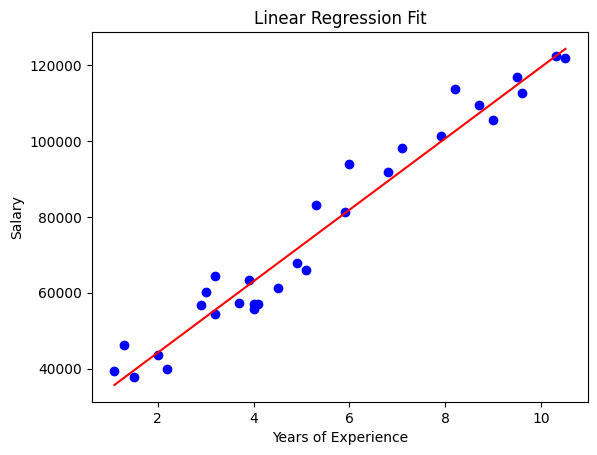

In [55]:
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Fit')
plt.show()


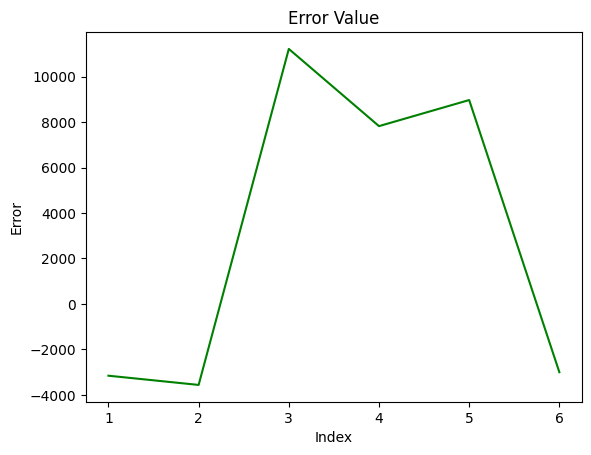

In [56]:
#Plotting the error
c = [i for i in range(1, len(y_test) + 1)]
error = y_test - y_pred

plt.plot(c, error, color='green', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [57]:
years_experience = np.array([[5]])  # Example: 5 years of experience
predicted_salary = model.predict(years_experience)
print(f"Predicted Salary for {years_experience[0][0]} years of experience: {predicted_salary[0]}")


Predicted Salary for 5 years of experience: 72440.6596269317


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
